# German Traffic Sign Detector
## Using LeNet in Tensor Flow

First import the modules from the directory

In [1]:
import os
from LENET import TF_LENET_infer,TF_LENET_test,TF_LENET_train
from data_processing import preprocessingdata,inverse_ohe,data_adequacy,infer_plot

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.getcwd() #This is the current directory

'D:\\UNIVERSIDAD\\EXTERNAS\\RETO_KIWI_DEEP_LEARNING\\German Traffic Signs Detector'

So, to implement this model using the click library you need to introduce the model 3 and the directory where the train images are, for example:

python app.py train -m 3 -d "D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector Try\images\train"

As we are going to make and example we first assign those variable

In [3]:
model='3'

In [19]:
#the directory when its and input from the cmd it is transformed by the os.chdir() so it can be made with this "\\" 
#instead of just "\"
directory='D:\\UNIVERSIDAD\\EXTERNAS\\RETO_KIWI_DEEP_LEARNING\\German Traffic Signs Detector\\images\\train'

### Now we are going to do the train so we define the function to show how it works
to run this from the command window

python app.py train -m 3 -d "D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector Try\images\train"

In [20]:
def train(model, directory):
    """
    Train model # from images in directory ...   
    
    \b
    INPUT:
    model: Number of model or name to train
        (0 - 'SK_LR' refers to SK logistic regression)
        (1 - 'TF_LR' refers to  TF Logistic regression)
        (2 - 'TF_LENET' refers to  TF LENET)
        
    directory: Directory where the train images are placed in format .ppm
    """
    os.chdir(directory)
    X_train, Y_train=data_adequacy(directory,train=True)
    os.chdir('..') 
    os.chdir('..')
    if model=='1' or model=='SK_LR':
        model_train_path=os.getcwd()+'\\models\\model1'
        X_train,Y_train=preprocessingdata(X_train,Y_train,directory)
        SK_LR_train(X_train,Y_train,model_train_path)
        pass
    elif model=='2' or model=='TF_LR':
        model_train_path=os.getcwd()+'\\models\\model2'
        TF_LR_train(X_train,Y_train,model_train_path,rate=0.0009, epochs=300, batch_size=64)
        pass
    elif model=='3' or model=='TF_LENET':
        model_train_path=os.getcwd()+'\\models\\model3'
        TF_LENET_train(X_train,Y_train,model_train_path,epochs=50,batch_size=64,rate=0.0009)
        pass
    else:
        print('Ingrese un numero de modelo que exista')

In [21]:
#Here we are going to train the LeNet Model
#We get the accuracy of the last model
train(model, directory)

EPOCH 50 ... Validation Accuracy = 1.000


### Now we are going to do the test so we define the function to show how it works
#### We have to change the directory since the images for testing are in another directory but we use the same model
to run this from the Command Window

python app.py test -m 3 -d "D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector Try\images\test"

In [22]:
directory='D:\\UNIVERSIDAD\\EXTERNAS\\RETO_KIWI_DEEP_LEARNING\\German Traffic Signs Detector\\images\\test'

In [23]:
def test(model, directory):
    """
    Test Model # from images in directory ...  
    
    \b
    INPUT:
    model: Number of model or name
      (0 or SK_LR refers to SK logistic regression)
      (1 or TF_LR refers to  TF Logistic regression)
      (2 or TF_LENET refers to  TF LENET)
        
    directory: Directory where the test images are placed in format .ppm
    """
    os.chdir(directory)
    X_test, Y_test=data_adequacy(directory,train=False)
    os.chdir('..') 
    os.chdir('..')
    if model=='1' or model=='SK_LR':
        model_train_path=os.getcwd()+'\\models\\model1'
        X_test, Y_test=preprocessingdata(X_test, Y_test, directory)
        SK_LR_test(X_test,Y_test,model_train_path)
        pass
    elif model=='2' or model=='TF_LR':
        model_train_path=os.getcwd()+'\\models\\model2'
        TF_LR_test(X_test,Y_test,model_train_path,batch_size=64)
        pass
    elif model=='3' or model=='TF_LENET':
        model_train_path=os.getcwd()+'\\models\\model3'
        TF_LENET_test(X_test,Y_test,model_train_path,batch_size=64)
        pass

In [24]:
test(model, directory)

INFO:tensorflow:Restoring parameters from D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector\models\model3\german_lenet.ckpt
Accuracy:  0.8559670811327397


### Finally, we are going to to the infer, so I pick some images of the test folder randomly and put them in the "user" folder
### So again, we need to change the directory and define the infering function
to run this from the Command Window

python app.py infering -m 3 -d "D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector Try\images\user"

In [10]:
directory='D:\\UNIVERSIDAD\\EXTERNAS\\RETO_KIWI_DEEP_LEARNING\\German Traffic Signs Detector\\images\\user'

In [11]:
def infer(model, directory):
    """
    Infer from model # from images in directory  
    
    \b
    INPUT:
    model: Number of model or name
      (0 or SK_LR refers to SK logistic regression)
      (1 or TF_LR refers to  TF Logistic regression)
      (2 or TF_LENET refers to  TF LENET)
        
    directory: Directory where the infer or user images are placed in format .ppm
    """
    os.chdir(directory)
    X_infer, Y_infer=data_adequacy(directory,train=False)
    os.chdir('..') 
    os.chdir('..')
    if model=='1' or model=='SK_LR':
        model_train_path=os.getcwd()+'\\models\\model1'
        X_infer_pre, Y_infer_pre=preprocessingdata(X_infer, Y_infer, directory)
        predict=SK_LR_infer(X_infer_pre,model_train_path)
        infer_plot(X_infer,predict,Y_infer_pre)
        pass
    elif model=='2' or model=='TF_LR':
        model_train_path=os.getcwd()+'\\models\\model2'
        predict=TF_LR_infer(X_infer,model_train_path)
        Y_infer_pre=inverse_ohe(directory,Y_infer)
        infer_plot(X_infer,predict,Y_infer_pre)
        pass
    elif model=='3' or model=='TF_LENET':
        model_train_path=os.getcwd()+'\\models\\model3'
        predict=TF_LENET_infer(X_infer,model_train_path)
        Y_infer_pre=inverse_ohe(directory,Y_infer)
        infer_plot(X_infer,predict,Y_infer_pre)
        pass

INFO:tensorflow:Restoring parameters from D:\UNIVERSIDAD\EXTERNAS\RETO_KIWI_DEEP_LEARNING\German Traffic Signs Detector\models\model3\german_lenet.ckpt


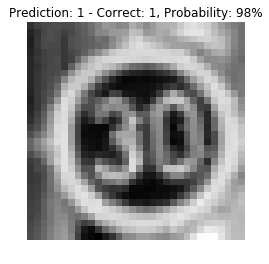

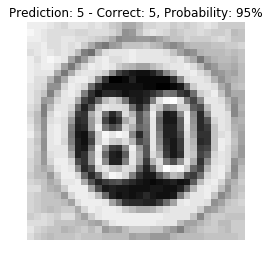

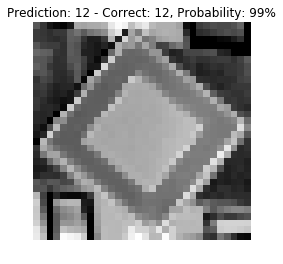

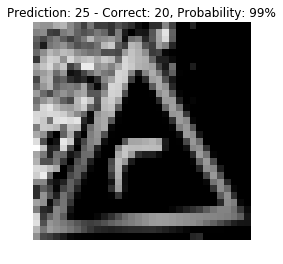

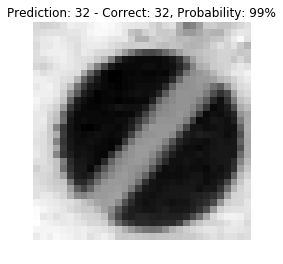

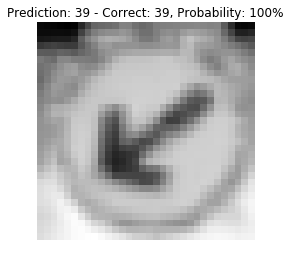

In [12]:
infer(model, directory)

### As we can see the model works well but it is not perfect, and some images are hard to classify